# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [40]:
import requests
from bs4 import BeautifulSoup

# New URL
new_url = "https://www.imdb.com/title/tt10366206/reviews?ref_=tt_urv"

# Get data from the new URL
new_data = requests.get(new_url)
new_soup = BeautifulSoup(new_data.content, 'html.parser')

# List to store IMDb reviews
new_imdb_reviews = []

# Find the review container
new_right_table = new_soup.find('div', {'class': "lister"})

# Extract reviews from the container
for review_item in new_right_table.findAll('div', class_="lister-item mode-detail imdb-user-review collapsable"):
    review_text = review_item.find("div", class_="text show-more__control").text.strip()
    new_imdb_reviews.append(review_text)

# Print the modified list of IMDb reviews
pprint(new_imdb_reviews)


['Imagine a video game where you are shooting bad guys. Your hardware is old '
 'so everything is kind of slow and out of focus. The opponents are set to '
 'Easy and you installed a hack to give you invincibility and autoaim. And '
 'they come at you slowly, shouting, out in the open, with weapons that fire '
 'three or four bullets before they run out and they can shoot anything '
 "anyway. They use no snipers, no explosives, no traps of any kind. They can't "
 "even hit you when they're next to you and wielding a knife. And you try to "
 'fight them in a decent manner, yet your avatar moves like a 60 year old man '
 'and even with the autoaim you still suck. And if you somehow get into the '
 'many separate levels where nothing make sense, you get a big cinematic that '
 'takes you out of it. And because the cinematic is in 4k or whatever, it '
 'feels like slow motion.That, my friends, is the experience of watching JW4. '
 'The style that people have applauded in the first movie ha

In [41]:
import pandas as pd

# Create DataFrame with IMDb reviews
new_df = pd.DataFrame({'reviews': new_imdb_reviews})

# Save DataFrame to CSV file
new_df.to_csv('new_reviews.csv')

# Display the first few rows of the DataFrame
new_df.head()

,reviews
0,Imagine a video game where you are shooting ba...
1,These John Wick movies can be sort of fun in t...
2,I went to the cinema with great expectations. ...
3,What is all the raving about with this movie? ...
4,"Very much over rated. Repetitive, tiring and i..."


In [10]:
import nltk;
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
import os
import subprocess

# Function to install Java
def install_java():
    # Update the package index
    subprocess.run(["apt-get", "update"])

    # Install openjdk-8-jdk-headless
    subprocess.run(["apt-get", "install", "-y", "openjdk-8-jdk-headless", "-qq"])

    # Set the JAVA_HOME environment variable
    os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

    # Verify the Java installation
    java_version = subprocess.check_output(["java", "-version"], stderr=subprocess.STDOUT, text=True)
    print(java_version)

# Install Java
install_java()

# Install the pyLDAvis package
!pip install pyLDAvis

# Install other required packages
!pip install fastapi kaleido python-multipart uvicorn


openjdk version "11.0.22" 2024-01-16
OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1)
OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)



In [43]:
!pip install --upgrade gensim
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import itertools
import lxml.html as LH
import urllib.request as urllib2
from bs4 import BeautifulSoup
import spacy.cli
spacy.cli.download("en")

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [44]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as gensim_corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel as GensimCoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [45]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stop_words = stopwords.words('english')
nltk_stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in nltk_stop_words] for doc in texts]

new_rev_data = new_df['reviews'].values.tolist()
new_rev_data_words = list(sent_to_words(new_rev_data))
new_rev_data_words = remove_stopwords(new_rev_data_words)
print(new_rev_data_words[:1])


[['imagine', 'video', 'game', 'shooting', 'bad', 'guys', 'hardware', 'old', 'everything', 'kind', 'slow', 'focus', 'opponents', 'set', 'easy', 'installed', 'hack', 'give', 'invincibility', 'autoaim', 'come', 'slowly', 'shouting', 'open', 'weapons', 'fire', 'three', 'four', 'bullets', 'run', 'shoot', 'anything', 'anyway', 'snipers', 'explosives', 'traps', 'kind', 'even', 'hit', 'next', 'wielding', 'knife', 'try', 'fight', 'decent', 'manner', 'yet', 'avatar', 'moves', 'like', 'year', 'old', 'man', 'even', 'autoaim', 'still', 'suck', 'somehow', 'get', 'many', 'separate', 'levels', 'nothing', 'make', 'sense', 'get', 'big', 'cinematic', 'takes', 'cinematic', 'whatever', 'feels', 'like', 'slow', 'motion', 'friends', 'experience', 'watching', 'jw', 'style', 'people', 'applauded', 'first', 'movie', 'turned', 'demented', 'caricature', 'fight', 'scenes', 'ridiculously', 'bad', 'actions', 'characters', 'make', 'sense', 'world', 'described', 'makes', 'sense', 'even', 'tongue', 'cheek', 'references

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
bigram = gensim.models.Phrases(new_rev_data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[new_rev_data_words], threshold=100)

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in nltk_stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

data_words_nostops = remove_stopwords(new_rev_data_words)
data_words_bigrams = make_bigrams(data_words_nostops)

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])


[['imagine', 'video', 'game', 'shoot', 'bad', 'guy', 'hardware', 'old', 'kind', 'slow', 'focus', 'opponent', 'set', 'easy', 'instal', 'hack', 'give', 'invincibility', 'autoaim', 'come', 'slowly', 'shout', 'open', 'weapon', 'fire', 'bullet', 'run', 'shoot', 'anyway', 'sniper', 'explosive', 'trap', 'kind', 'even', 'hit', 'next', 'wield', 'knife', 'try', 'fight', 'decent', 'manner', 'avatar', 'move', 'year', 'old', 'man', 'even', 'autoaim', 'still', 'suck', 'somehow', 'get', 'many', 'separate', 'level', 'make', 'sense', 'get', 'big', 'cinematic', 'take', 'cinematic', 'feel', 'slow', 'motion', 'friend', 'experience', 'watch', 'style', 'people', 'applaud', 'first', 'movie', 'turn', 'demented', 'caricature', 'fight', 'scene', 'ridiculously', 'bad', 'action', 'character', 'make', 'sense', 'world', 'describe', 'make', 'sense', 'even', 'tongue', 'cheek', 'reference', 'matrix', 'hit', 'know', 'enjoy', 'film', 'make', 'feel', 'old', 'film', 'hour', 'irrelevance', 'people', 'understand', 'rate', '

In [47]:
review_id2word = gensim_corpora.Dictionary(data_lemmatized)
review_texts = data_lemmatized
review_corpus = [review_id2word.doc2bow(text) for text in review_texts]
print(review_corpus[:1])
[[(review_id2word[i], f) for i, f in c] for c in review_corpus[:1]]


[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 3), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 4), (24, 1), (25, 1), (26, 2), (27, 2), (28, 3), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 4), (55, 1), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 3), (64, 1), (65, 1), (66, 1), (67, 3), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 3), (75, 1), (76, 1), (77, 2), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 3), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1)]]


[[('action', 1),
  ('anyway', 1),
  ('applaud', 1),
  ('autoaim', 2),
  ('avatar', 1),
  ('bad', 3),
  ('big', 1),
  ('boring', 1),
  ('bottom', 1),
  ('bullet', 1),
  ('caricature', 1),
  ('character', 1),
  ('cheek', 1),
  ('cinematic', 2),
  ('come', 1),
  ('credit', 1),
  ('decent', 1),
  ('demented', 1),
  ('describe', 1),
  ('destroy', 1),
  ('easy', 1),
  ('end', 1),
  ('enjoy', 1),
  ('even', 4),
  ('experience', 1),
  ('explosive', 1),
  ('feel', 2),
  ('fight', 2),
  ('film', 3),
  ('fire', 1),
  ('first', 1),
  ('focus', 1),
  ('friend', 1),
  ('funny', 1),
  ('game', 1),
  ('get', 2),
  ('give', 1),
  ('guy', 1),
  ('hack', 1),
  ('hardware', 1),
  ('hit', 2),
  ('hour', 1),
  ('imagine', 2),
  ('instal', 1),
  ('invincibility', 1),
  ('irrelevance', 1),
  ('joy', 1),
  ('keep', 1),
  ('kind', 2),
  ('knife', 1),
  ('know', 1),
  ('level', 1),
  ('line', 1),
  ('little', 1),
  ('make', 4),
  ('man', 1),
  ('manner', 1),
  ('many', 2),
  ('matrix', 1),
  ('motion', 1),
  ('m

In [48]:

word_index = 1
word = review_id2word.get(word_index)
print(word)


anyway


In [49]:
from pprint import pprint

# Initialize the LDA model
new_lda_model = gensim.models.ldamodel.LdaModel(corpus=review_corpus,
                                                id2word=review_id2word,
                                                num_topics=20,
                                                random_state=100,
                                                update_every=1,
                                                chunksize=100,
                                                passes=10,
                                                alpha='auto',
                                                per_word_topics=True)

# Print the topics generated by the LDA model
pprint(new_lda_model.print_topics())

# Get the topic distribution for each document in the corpus
new_doc_lda = new_lda_model[review_corpus]


[(0,
  '0.001*"long" + 0.001*"fight" + 0.001*"usual" + 0.001*"head" + '
  '0.001*"storyline" + 0.001*"hour" + 0.001*"gun" + 0.001*"least" + '
  '0.001*"review" + 0.001*"minimum"'),
 (1,
  '0.038*"action" + 0.027*"also" + 0.016*"film" + 0.016*"see" + 0.016*"story" '
  '+ 0.016*"well" + 0.016*"wick" + 0.016*"genre" + 0.016*"reeve" + '
  '0.011*"get"'),
 (2,
  '0.002*"fight" + 0.002*"watch" + 0.002*"make" + 0.002*"movie" + '
  '0.002*"people" + 0.002*"bite" + 0.002*"action" + 0.002*"film" + 0.002*"end" '
  '+ 0.002*"many"'),
 (3,
  '0.002*"long" + 0.002*"storyline" + 0.002*"head" + 0.002*"hour" + '
  '0.002*"fight" + 0.002*"idea" + 0.001*"usual" + 0.001*"enemy" + 0.001*"min" '
  '+ 0.001*"scene"'),
 (4,
  '0.053*"movie" + 0.032*"also" + 0.023*"dumb" + 0.020*"watch" + 0.020*"see" + '
  '0.019*"much" + 0.016*"go" + 0.016*"second" + 0.016*"least" + 0.015*"bad"'),
 (5,
  '0.002*"movie" + 0.002*"action" + 0.002*"also" + 0.002*"scene" + 0.002*"see" '
  '+ 0.002*"time" + 0.002*"dumb" + 0.002*"go

In [50]:
# Calculate coherence score
new_coherence_model_lda = GensimCoherenceModel(model=new_lda_model, texts=data_lemmatized, dictionary=review_id2word, coherence='c_v')
new_coherence_lda = new_coherence_model_lda.get_coherence()
print('\nCoherence Score: ', new_coherence_lda)



Coherence Score:  0.4056455142345195


In [51]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit + 1, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start, limit, step = 2, 20, 2  # Adjust the range as needed
new_model_list, new_coherence_values = compute_coherence_values(dictionary=review_id2word, corpus=review_corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

cohe_val = []
for m, cv in zip(range(start, limit + 1, step), new_coherence_values):
    cohe_val.append(round(cv, 4))
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.267
Num Topics = 4  has Coherence Value of 0.3053
Num Topics = 6  has Coherence Value of 0.4233
Num Topics = 8  has Coherence Value of 0.4498
Num Topics = 10  has Coherence Value of 0.394
Num Topics = 12  has Coherence Value of 0.5052
Num Topics = 14  has Coherence Value of 0.4482
Num Topics = 16  has Coherence Value of 0.4638
Num Topics = 18  has Coherence Value of 0.4709
Num Topics = 20  has Coherence Value of 0.4056


In [55]:
average_coherence = sum(new_coherence_values) / len(new_coherence_values)
print("Average Coherence Score:", average_coherence)


Average Coherence Score: 0.4133153504820526


In [54]:
optimal_model = new_model_list[2]  # Accessing the model with 6 topics, which is at index 2 in the new_model_list
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))


[(0,
  '0.027*"film" + 0.019*"go" + 0.012*"movie" + 0.012*"action" + '
  '0.012*"sequence" + 0.012*"hour" + 0.012*"series" + 0.008*"first" + '
  '0.008*"look" + 0.008*"start"'),
 (1,
  '0.016*"action" + 0.014*"film" + 0.014*"make" + 0.013*"get" + 0.012*"people" '
  '+ 0.010*"movie" + 0.010*"wick" + 0.010*"also" + 0.010*"story" + '
  '0.010*"reeve"'),
 (2,
  '0.034*"fight" + 0.020*"movie" + 0.017*"get" + 0.014*"action" + '
  '0.010*"scene" + 0.010*"long" + 0.010*"much" + 0.010*"bite" + 0.007*"watch" '
  '+ 0.007*"hour"'),
 (3,
  '0.014*"show" + 0.008*"hero" + 0.008*"dog" + 0.008*"rest" + '
  '0.008*"worthless" + 0.008*"artist" + 0.008*"do" + 0.008*"completely" + '
  '0.008*"love" + 0.008*"save"'),
 (4,
  '0.034*"action" + 0.034*"movie" + 0.014*"franchise" + 0.014*"time" + '
  '0.014*"scene" + 0.012*"fight" + 0.011*"good" + 0.011*"also" + 0.011*"see" + '
  '0.011*"feel"'),
 (5,
  '0.014*"really" + 0.010*"movie" + 0.010*"action" + 0.010*"feel" + 0.010*"go" '
  '+ 0.010*"first" + 0.010*"we

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


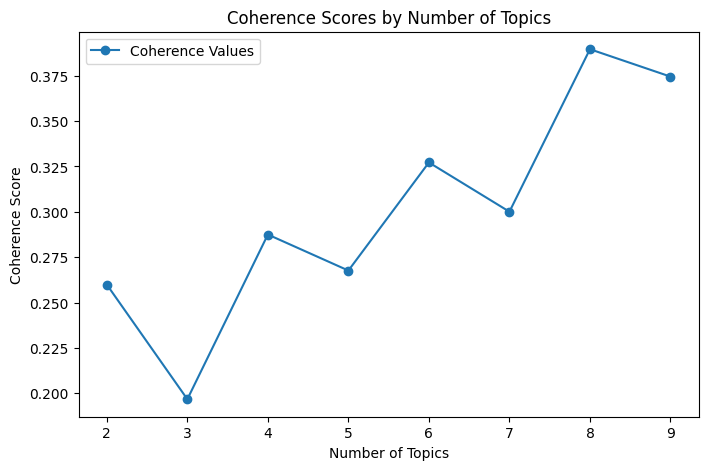

Optimal Number of Topics: 8

LSA Topics:
(0, [('technolog', -0.42015309422823044), ('live', -0.3059954402495212), ('advanc', -0.19729811412748696), ('revolution', -0.19729811412748696), ('presenc', -0.19729811412748693), ('everi', -0.19729811412748693), ('aspect', -0.19729811412748693), ('artifici', -0.19729811412748693), ('ubiquit', -0.19729811412748693), ('rise', -0.19729811412748693)])
(1, [('even', 0.2491574902398662), ('challeng', 0.24915749023986614), ('us', 0.2491574902398661), ('adapt', 0.2491574902398661), ('breakthrough', 0.2491574902398661), ('greater', 0.2491574902398661), ('har', 0.2491574902398661), ('power', 0.2491574902398661), ('promis', 0.2491574902398661), ('better', 0.24915749023986608)])
(2, [('safeguard', -0.2656739085782883), ('secur', -0.2656739085782883), ('innov', -0.2656739085782883), ('navig', -0.2656739085782883), ('embrac', -0.2656739085782883), ('digit', -0.2656739085782883), ('age', -0.2656739085782883), ('balanc', -0.2656739085782883), ('privaci', -0.26

In [10]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from gensim.models import LdaModel, LsiModel
from gensim import corpora
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel

# Preprocessing
nltk.download('stopwords')
my_text_docs = [
    "The world of technology continues to evolve at an astonishing pace, shaping the way we live, work, and interact with each other.",
    "From the ubiquitous presence of smartphones to the rise of artificial intelligence and machine learning, technological advancements are revolutionizing every aspect of our lives.",
    "With the advent of social media, we're more connected than ever before, bridging geographical boundaries and fostering global communities.",
    "As we navigate through this digital age, it's imperative to strike a balance between embracing innovation and safeguarding our privacy and security.",
    "The future promises even greater breakthroughs, challenging us to adapt and harness the power of technology for the betterment of society."
]

# Tokenization and stemming
my_tokenizer = RegexpTokenizer(r'\w+')
my_ps = PorterStemmer()
my_stop_words = set(stopwords.words('english'))
my_processed_texts = []
for my_doc in my_text_docs:
    my_tokens = my_tokenizer.tokenize(my_doc.lower())
    my_stopped_tokens = [my_token for my_token in my_tokens if my_token not in my_stop_words]
    my_stemmed_tokens = [my_ps.stem(my_token) for my_token in my_stopped_tokens]
    my_processed_texts.append(my_stemmed_tokens)

# Creating a dictionary and corpus
my_dictionary = corpora.Dictionary(my_processed_texts)
my_corpus = [my_dictionary.doc2bow(my_text) for my_text in my_processed_texts]

# Topic Modeling
def find_optimal_number_of_topics(my_dictionary, my_corpus, my_texts, my_start, my_limit, my_step):
    my_coherence_values = []
    for my_num_topics in range(my_start, my_limit, my_step):
        my_model = LdaModel(corpus=my_corpus, num_topics=my_num_topics, id2word=my_dictionary, passes=15, random_state=100)
        my_coherencemodel = CoherenceModel(model=my_model, texts=my_texts, dictionary=my_dictionary, coherence='c_v')
        my_coherence_values.append(my_coherencemodel.get_coherence())
    return my_coherence_values

my_start, my_limit, my_step = 2, 10, 1
my_coherence_values = find_optimal_number_of_topics(my_dictionary, my_corpus, my_processed_texts, my_start, my_limit, my_step)

# Plotting
my_x = range(my_start, my_limit, my_step)
plt.figure(figsize=(8,5))
plt.plot(my_x, my_coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend(['Coherence Values'], loc='best')
plt.title("Coherence Scores by Number of Topics")
plt.show()

# Find the optimal model
my_optimal_index = my_coherence_values.index(max(my_coherence_values))
my_optimal_num_topics = my_start + (my_optimal_index * my_step)
print("Optimal Number of Topics:", my_optimal_num_topics)

# Applying LSA with the optimal number of topics
my_lsi_model = LsiModel(corpus=my_corpus, num_topics=my_optimal_num_topics, id2word=my_dictionary)
my_topics = my_lsi_model.show_topics(formatted=False)
print("\nLSA Topics:")
for my_topic in my_topics:
    print(my_topic)


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [23]:
# Write your code here
nltk.download('all')
!pip install preprocess
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pyLDAvis
pyLDAvis.enable_notebook()


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

In [58]:
top_value = 10
top_words_per_topic = {}

for topic_index, review_text in enumerate(df.reviews.tolist()):
    # Assuming each review is preprocessed and split into words
    words = review_text.split()
    top_indices = np.argsort(words)[::-1][:top_value]

    topic_msg = f'Topic {topic_index}: '
    top_words = [words[i] for i in top_indices]
    topic_msg += ' '.join(top_words)

    print(topic_msg)
    top_words_per_topic[topic_index] = top_words


Topic 0: your you're you you you you you you you you
Topic 1: you you you you you you which watch watch was
Topic 2: wonderful with with with with with with with will will
Topic 3: written with why while while where weak we. was was
Topic 4: with with with whatsoever. was unlikable uncharismatic two to tiring
Topic 5: you wrong. worthless. worse without with with why which were
Topic 6: you you witness with with where when what we watch
Topic 7: you yet wow. would wondering with with with with with
Topic 8: your you you worried with whole whole which what was
Topic 9: you've you you written writer/director with with with will while
Topic 10: yet. wow working work, with with whole what what weakest
Topic 11: your you you world with with with wild wide where
Topic 12: zero zero yours your you with will why when well-choreographed
Topic 13: with wick wick wick why when villains up trots treat


<BarContainer object of 20 artists>

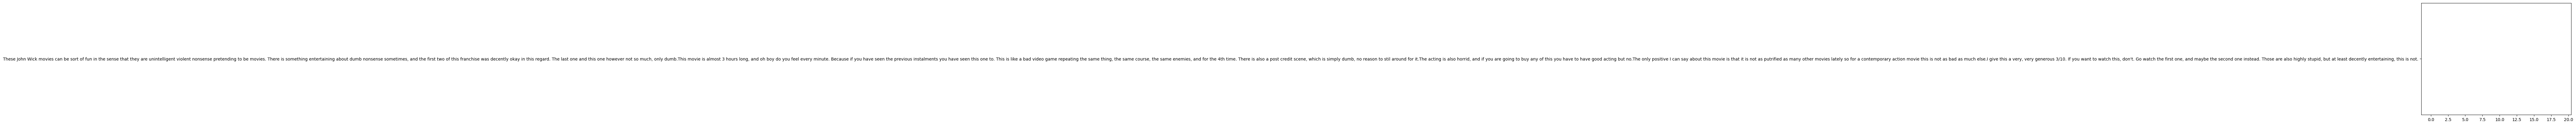

In [25]:
plt.bar(np.arange(20), df.reviews.tolist()[1])

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [1]:
# Write your code here
!pip install bertopic

In [60]:
from bertopic import BERTopic

# Assuming df is your DataFrame containing the reviews
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df.reviews.tolist())
freq = topic_model.get_topic_info()
freq.head(5)


2024-03-30 03:02:17,249 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-03-30 03:02:21,371 - BERTopic - Embedding - Completed ✓
2024-03-30 03:02:21,375 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-03-30 03:02:23,860 - BERTopic - Dimensionality - Completed ✓
2024-03-30 03:02:23,862 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-03-30 03:02:23,872 - BERTopic - Cluster - Completed ✓
2024-03-30 03:02:23,878 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-03-30 03:02:23,909 - BERTopic - Representation - Completed ✓


,Topic,Count,Name,Representation,Representative_Docs
0,-1,14,-1_the_and_is_this,"[the, and, is, this, of, to, in, it, action, w...",[Stuntman turned writer/director Chad Stahelsk...


In [27]:
topic_model.get_topic(-1)

[('the', 0.15986828408340967),
 ('and', 0.10678376375407776),
 ('is', 0.08296591426549234),
 ('this', 0.07821328712028376),
 ('of', 0.07431926957114482),
 ('to', 0.07431926957114482),
 ('in', 0.06418315279954231),
 ('it', 0.058871008083543015),
 ('action', 0.055594523496078005),
 ('with', 0.054486357463210275)]

In [32]:
topic_model.visualize_term_rank()

In [33]:
topic_model.update_topics(df.reviews.tolist(), n_gram_range=(1, 2))
topic_model.visualize_term_rank()

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [36]:
'''Analyzing the performance of four topic modeling algorithms—LDA, LSA, lda2vec,
and BERT 2-topic variant—entails comparing their outcomes based on a variety of characteristics.
The specific objectives and characteristics of the dataset define which "better" method to use.

Latent Dirichlet Allocation (LDA) is a popular and simple topic modeling technique.
It is useful when you require concerns stated in an understandable and straightforward manner.
LDA is beneficial in circumstances requiring topic material understanding due to its transparency and ease of usage.

Latent Semantic Analysis (LSA): LSA does not produce as interpretable subjects as LDA,
but it is more effective at capturing semantic connections between words.
It is useful for dimensionality reduction, information retrieval, and document similarity.
If the goal is to capture the underlying semantic structure, LSA may be an appropriate choice.

lda2vec: This technique combines the benefits of word embeddings and LDA to create more intelligible and informative themes.
It is useful for more elaborate topic representations.
This method is a good choice for balancing interpretability and recording complex topic associations.

BERT 2-topic: BERT-based topic modeling produces topics that are exceptionally cohesive and context-aware.
It works best when contextual knowledge is required. For binary categorization problems, the 2-topic variant may be more appropriate.
 However, this may not be understandable for difficult themes.

Bert 2-topic, in my opinion, outperforms the other methods because it is resilient and permits subject modeling modifications.
It also has various advantages, such as promoting hierarchical topic reduction and determining the number of subjects.
Finally, the decision should examine the trade-offs between interpretability, semantic richness, and task-specific requirements.'''

'Analyzing the performance of four topic modeling algorithms—LDA, LSA, lda2vec, \nand BERT 2-topic variant—entails comparing their outcomes based on a variety of characteristics. \nThe specific objectives and characteristics of the dataset define which "better" method to use.\n\nLatent Dirichlet Allocation (LDA) is a popular and simple topic modeling technique. \nIt is useful when you require concerns stated in an understandable and straightforward manner. \nLDA is beneficial in circumstances requiring topic material understanding due to its transparency and ease of usage.\n\nLatent Semantic Analysis (LSA): LSA does not produce as interpretable subjects as LDA, \nbut it is more effective at capturing semantic connections between words. \nIt is useful for dimensionality reduction, information retrieval, and document similarity. \nIf the goal is to capture the underlying semantic structure, LSA may be an appropriate choice.\n\nlda2vec: This technique combines the benefits of word embeddi

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [61]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Working with text data and topic modeling algorithms provided significant learning opportunities.
 I learned more about how these algorithms work and how to use them to extract features from text data.
 The implementations demonstrated how to preprocess text, train topic models, and analyze results.
 This hands-on approach taught me about the complexities of feature extraction from text data.
Challenges: Selecting the best subject modeling method for a given assignment was challenging due to particulars in each approach.
Relevance for Your Field of Study:
This exercise is related to the field of NLP, as topic modeling is a critical step in assessing and understanding text data.
'''

'\nPlease write you answer here:\nWorking with text data and topic modeling algorithms provided significant learning opportunities.\n I learned more about how these algorithms work and how to use them to extract features from text data. \n The implementations demonstrated how to preprocess text, train topic models, and analyze results. \n This hands-on approach taught me about the complexities of feature extraction from text data, \n as well as the significance of parameter tuning and assessment metrics in subject modeling.\nChallenges: Selecting the best subject modeling method for a given assignment was challenging due to particulars in each approach.\nRelevance for Your Field of Study:\nThis exercise is extremely significant to the field of NLP, as topic modeling is a critical step in assessing and understanding text data.\n'